In [28]:
! echo `whoami` @ `hostname`

mt @ tomopy-bnl-gov


In [29]:
import os
import matplotlib.pyplot as plt
% matplotlib notebook
# %load_ext pyopencl.ipython_ext

import yaml

import warnings
warnings.filterwarnings('ignore')

In [30]:
dpath = '/home/mt/learn/xpdAcqAn/data/reza/Ni2v-480'
os.chdir(dpath)

In [31]:
# here is the data (7.2 GiB)
! ls

comp_logscale.pdf  dark_sub  iq    mask  moke.dat  sq
comp.pdf	   fq	     itth  meta  pdf


<IPython.core.display.Javascript object>


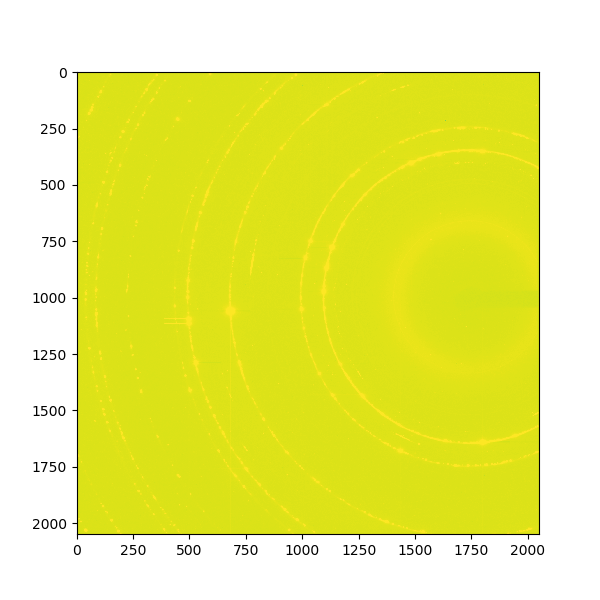

In [33]:
#
import tifffile
import numpy as np

f = dpath+'/dark_sub/Ni2v-480_20180717-072427_8a037d_0001.tiff'
img = tifffile.imread(f)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot('111')

ax.imshow(img, vmax=100)

In [9]:
#
with open(dpath+'/meta/Ni2v-480_8a037d.yaml', 'r') as f:
    meta = yaml.load(f)
print(meta['calibration_md'])

{'calibrant_name': 'undefined', 'centerX': 1739.5911055913032, 'centerY': 996.5629338472975, 'dSpacing': [3.12441816, 2.7058255, 1.91330756, 1.63167417, 1.56220908, 1.35291275, 1.24151789, 1.21008195, 1.10464863, 1.04147272, 0.95665378, 0.91473597, 0.90194183, 0.85565715, 0.82526904, 0.81583708, 0.78110454, 0.75778271, 0.75046097, 0.72316228, 0.70453695, 0.67645637, 0.6611384, 0.65625908, 0.63776919, 0.62488363, 0.62075894, 0.60504098, 0.59400587, 0.59045953, 0.57688393, 0.56729517, 0.55232432, 0.54389139, 0.5411651, 0.53065604, 0.52316405, 0.52073636, 0.50463906, 0.50245918, 0.50030731], 'detector': 'Perkin detector', 'directDist': 1419.8553079885053, 'dist': 1.4197799537507336, 'pixel1': 0.0002, 'pixel2': 0.0002, 'pixelX': 200.0, 'pixelY': 200.0, 'poni1': 0.19680379033758916, 'poni2': 0.3623294837680643, 'poni_file_name': '/tmp/tmpy7o32dcs/from_calib_func.poni', 'rot1': 0.01015000085997972, 'rot2': 0.0017669390135718567, 'rot3': 1.0701327607816483e-06, 'splineFile': None, 'tilt': 0.5

In [34]:
#
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
ai = AzimuthalIntegrator()
ai.setPyFAI(**meta['calibration_md'])
ai.save(dpath+'/meta/Ni2v-480_8a037d.poni')

In [11]:
from xpdtools.cli.process_tiff import main
main?

In [12]:
# you can also inspect the docs associated with the function via
# main?
main(poni_file=dpath+'/meta/Ni2v-480_8a037d.poni',
     image_files=dpath+'/dark_sub/Ni2v-480_20180717-072427_8a037d_0001.tiff',
     alpha=2.5);

main(poni_file=dpath+'/meta/Ni2v-480_8a037d.poni',
     image_files=dpath+'/dark_sub/Ni2v-480_20180717-072427_8a037d_0020.tiff',
     alpha=2.5);

main(poni_file=dpath+'/meta/Ni2v-480_8a037d.poni',
     image_files=dpath+'/dark_sub/Ni2v-480_20180717-072427_8a037d_0200.tiff',
     alpha=2.5);

main(poni_file=dpath+'/meta/Ni2v-480_8a037d.poni',
     image_files=dpath+'/dark_sub/Ni2v-480_20180717-072427_8a037d_0270.tiff',
     alpha=2.5);

{'edge': 20, 'lower_thresh': 1.0, 'upper_thresh': None, 'alpha': 2.5, 'auto_type': 'median', 'tmsk': None}
start auto mask


100%|██████████| 2841/2841 [00:00<00:00, 2287.79it/s]


finished auto mask
{'edge': 20, 'lower_thresh': 1.0, 'upper_thresh': None, 'alpha': 2.5, 'auto_type': 'median', 'tmsk': None}
start auto mask


100%|██████████| 2841/2841 [00:00<00:00, 6164.92it/s]


finished auto mask
{'edge': 20, 'lower_thresh': 1.0, 'upper_thresh': None, 'alpha': 2.5, 'auto_type': 'median', 'tmsk': None}
start auto mask


100%|██████████| 2841/2841 [00:00<00:00, 3645.74it/s]


finished auto mask
{'edge': 20, 'lower_thresh': 1.0, 'upper_thresh': None, 'alpha': 2.5, 'auto_type': 'median', 'tmsk': None}
start auto mask


100%|██████████| 2840/2840 [00:00<00:00, 6139.23it/s]


finished auto mask


In [13]:
# this will show the mask on the image

mask = np.load(dpath+'/dark_sub/Ni2v-480_20180717-072427_8a037d_0001_mask.npy')
overlay = overlay_mask(img, mask)
plt.imshow(overlay, vmax=100)

In [14]:
# compare old and new 

# time = 0
o_0000 = np.loadtxt(dpath+'/iq/Ni2v-480_20180717-072427_8a037d_0001.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8) 
n_0000 = np.loadtxt(dpath+'/dark_sub/Ni2v-480_20180717-072427_8a037d_0001.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8)


# time = 10
o_0010 = np.loadtxt(dpath+'/iq/Ni2v-480_20180717-072427_8a037d_0020.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8) 
n_0010 = np.loadtxt(dpath+'/dark_sub/Ni2v-480_20180717-072427_8a037d_0020.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8)


# time = 100
o_0100 = np.loadtxt(dpath+'/iq/Ni2v-480_20180717-072427_8a037d_0200.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8) 
n_0100 = np.loadtxt(dpath+'/dark_sub/Ni2v-480_20180717-072427_8a037d_0200.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8)


# time = 135
o_0135 = np.loadtxt(dpath+'/iq/Ni2v-480_20180717-072427_8a037d_0270.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8) 
n_0135 = np.loadtxt(dpath+'/dark_sub/Ni2v-480_20180717-072427_8a037d_0270.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8)


<IPython.core.display.Javascript object>


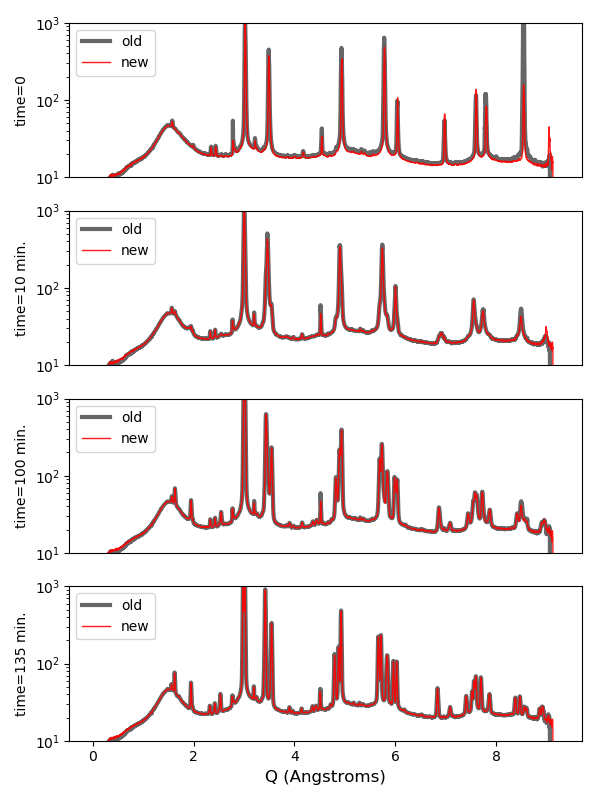

In [15]:
#
fig = plt.figure(figsize=(6,8))

ax = fig.add_subplot('411')
ax.plot(o_0000[0],o_0000[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0000[0],n_0000[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('time=0')
ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_ylim([10,1000])

ax = fig.add_subplot('412')
ax.plot(o_0010[0],o_0010[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0010[0],n_0010[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('time=10 min.')
ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_ylim([10,1000])

ax = fig.add_subplot('413')
ax.plot(o_0100[0],o_0100[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0100[0],n_0100[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('time=100 min.')
ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_ylim([10,1000])

ax = fig.add_subplot('414')
ax.plot(o_0135[0],o_0135[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0135[0],n_0135[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xlabel('Q (Angstroms)', fontsize=12)
ax.set_ylabel('time=135 min.')
ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_ylim([10,1000])

plt.tight_layout()
plt.savefig('comp_logscale.pdf')

In [16]:
# Lets do PBA

<IPython.core.display.Javascript object>


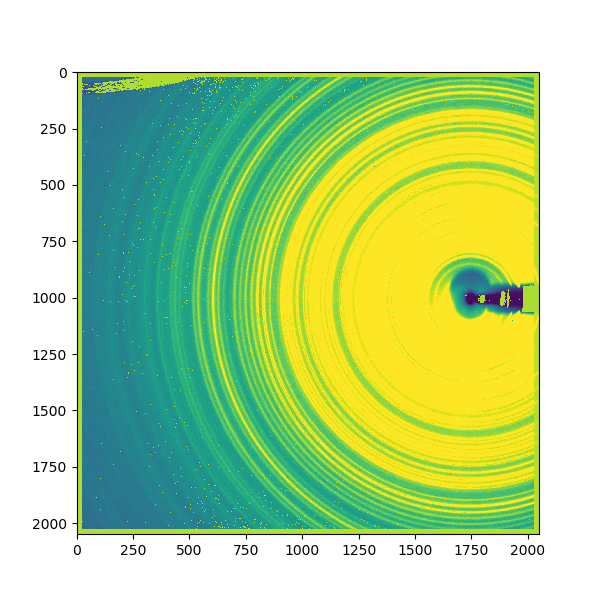

In [17]:
#
import tifffile
import numpy as np

f = '/home/mt/learn/xpdAcqAn/data/PBA/SB-CuK/dark_sub/SB-CuK_20171010-174236_e01a28_001.tiff'
img = tifffile.imread(f)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot('111')

ax.imshow(img, vmax=500)

In [23]:
with open('/home/mt/learn/xpdAcqAn/data/PBA/SB-CuK/SB-CuK_753b4e.yml', 'r') as f:
    meta = yaml.load(f)
print(meta['calibration_md'])

{'calibrant_name': 'undefined', 'centerX': 1744.2187968884791, 'centerY': 1007.2541600342283, 'dSpacing': [2.03458234862, 1.761935, 1.24592214845, 1.06252597829, 1.01729117431, 0.881, 0.80846104616, 0.787990355271, 0.719333487797, 0.678194116208, 0.622961074225, 0.595664718733, 0.587333333333, 0.557193323722, 0.537404961852, 0.531262989146, 0.508645587156, 0.493458701611, 0.488690872874, 0.47091430825, 0.458785722296, 0.4405, 0.430525121912, 0.427347771314], 'detector': 'Perkin detector', 'directDist': 1185.5460677813164, 'dist': 1.185542959153833, 'pixel1': 0.0002, 'pixel2': 0.0002, 'pixelX': 200.0, 'pixelY': 200.0, 'poni1': 0.20138945068600533, 'poni2': 0.35155799312739816, 'poni_file_name': '/tmp/tmpkdpdpcqm/from_calib_func.poni', 'rot1': 0.002289439607813661, 'rot2': 5.1774724353517843e-05, 'rot3': -5.639906045552904e-10, 'splineFile': None, 'tilt': 0.13120876541155604, 'tiltPlanRotation': 178.70449942944666, 'time': '20171010-115347', 'wavelength': 1.8667000000000002e-11}


In [18]:
#
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
ai = AzimuthalIntegrator()
ai.setPyFAI(**meta['calibration_md'])
ai.save('/home/mt/learn/xpdAcqAn/data/PBA/SB-CuK/SB-CuK_753b4e.poni')

In [19]:
from xpdtools.cli.process_tiff import main

In [20]:
# main?
main(poni_file='/home/mt/learn/xpdAcqAn/data/PBA/SB-CuK/SB-CuK_753b4e.poni',
     image_files='/home/mt/learn/xpdAcqAn/data/PBA/SB-CuK/dark_sub/SB-CuK_20171010-174236_e01a28_001.tiff',
     alpha=2.5);

{'edge': 20, 'lower_thresh': 1.0, 'upper_thresh': None, 'alpha': 2.5, 'auto_type': 'median', 'tmsk': None}
start auto mask


100%|██████████| 2841/2841 [00:00<00:00, 9343.29it/s]


finished auto mask


In [21]:
# this will show the mask on the image
from xpdtools.tools import overlay_mask
mask = np.load('/home/mt/learn/xpdAcqAn/data/PBA/SB-CuK/dark_sub/SB-CuK_20171010-174236_e01a28_001_mask.npy')
overlay = overlay_mask(img, mask)
plt.imshow(overlay, vmax=100)

<IPython.core.display.Javascript object>


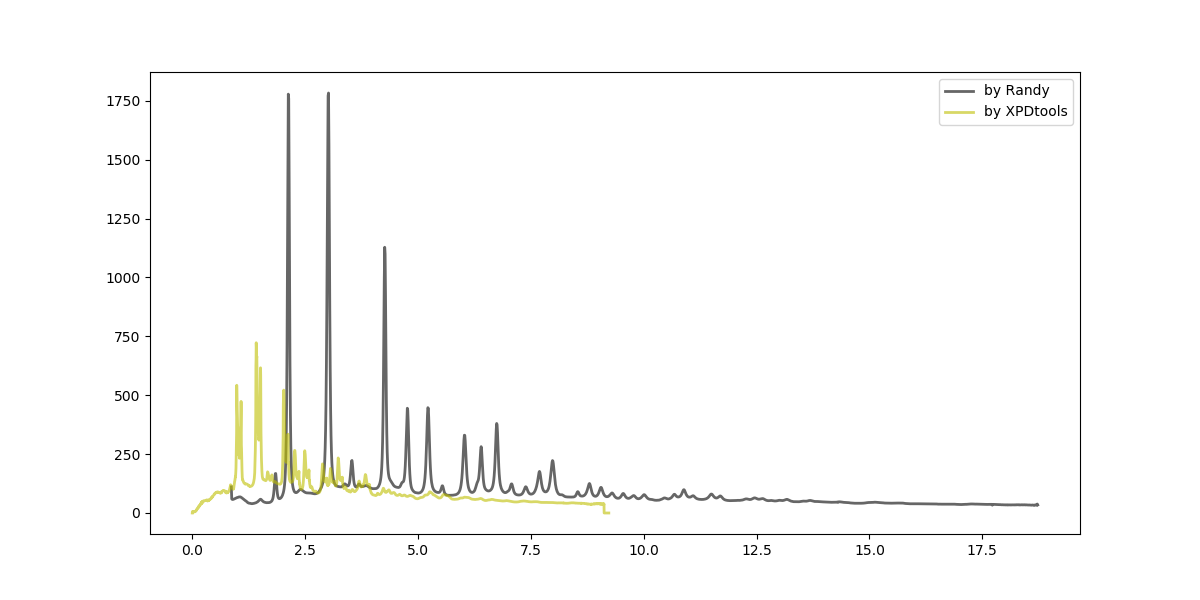

In [27]:
# compare old and new 

# new
old_data = np.loadtxt('/home/mt/learn/xpdAcqAn/data/PBA/XYE BULK/SB-CuK_20171010-174236_e01_C.xye', unpack=True, comments='#', usecols=(0,1), skiprows=0) 
new_data = np.loadtxt('/home/mt/learn/xpdAcqAn/data/PBA/SB-CuK/dark_sub/SB-CuK_20171010-174236_e01a28_001.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8) 

#
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot('111')
ax.plot(old_data[0],old_data[1],'k-',lw=2,alpha=0.6,label='by Randy')
ax.plot(new_data[0],new_data[1],'y-',lw=2,alpha=0.6,label='by XPDtools')
# ax.set_yticks([])
# ax.set_xticks([])
# ax.set_ylabel('time=0')
ax.legend(loc='best')
# ax.set_yscale('log')
# ax.set_ylim([10,1000])